In [1]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Final_data_National_lag.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/1995,17589,5.23,15,5.5,48.259257,17393.76,United States
1,12/31/1996,18067,5.52,16,5.7,48.109691,17850.20,United States
2,12/31/1997,18780,5.80,17,5.9,48.270662,18543.37,United States
3,12/31/1998,19892,6.09,18,6.1,47.897656,19639.37,United States
4,12/31/1999,22356,6.41,19,6.2,48.446173,22081.02,United States


In [3]:
df.sort_values(by=['Year'], inplace=True, ascending=True)
df = df.loc[df['State']=='United States']
df

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/1995,17589,5.23,15,5.5,48.259257,17393.76,United States
1,12/31/1996,18067,5.52,16,5.7,48.109691,17850.20,United States
2,12/31/1997,18780,5.80,17,5.9,48.270662,18543.37,United States
3,12/31/1998,19892,6.09,18,6.1,47.897656,19639.37,United States
4,12/31/1999,22356,6.41,19,6.2,48.446173,22081.02,United States
5,12/31/2000,22879,6.62,20,6.8,48.332023,22618.18,United States
6,12/31/2001,22902,6.85,21,8.2,48.584221,22674.20,United States
7,12/31/2002,24121,7.12,22,8.9,48.561956,23896.16,United States
8,12/31/2003,25034,6.92,22,9.4,48.934943,24817.91,United States
9,12/31/2004,27745,7.19,23,10.1,48.361734,27487.03,United States


In [4]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O','State'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,41885.06


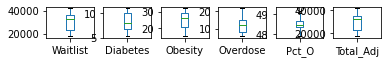

In [5]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

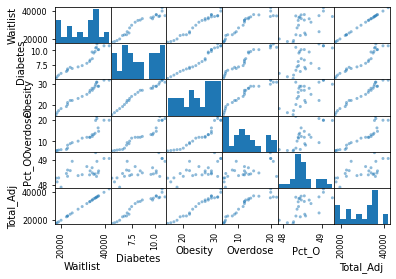

In [6]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [7]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,30026.440000,8.275200,24.840000,12.216000,48.538864,29780.869200
std,7412.858749,1.874002,5.257376,5.145279,0.315741,7410.632005
min,17589.000000,5.230000,15.000000,5.500000,47.897656,17393.760000
25%,22902.000000,6.850000,21.000000,8.200000,48.361734,22674.200000
50%,33037.000000,8.100000,26.000000,11.900000,48.467679,32721.300000
75%,35828.000000,10.120000,29.000000,14.700000,48.677516,35565.270000
max,42085.000000,11.090000,32.000000,21.700000,49.282640,41885.060000


In [8]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.979763  0.954046  0.615793
Obesity   0.979763  1.000000  0.943390  0.627167
Overdose  0.954046  0.943390  1.000000  0.652071
Pct_O     0.615793  0.627167  0.652071  1.000000


In [9]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [10]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#Create model
model = LinearRegression()

In [12]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9772590513612693
Testing Score: 0.9607620360666692


Text(0.5, 1.0, 'Residual Plot')

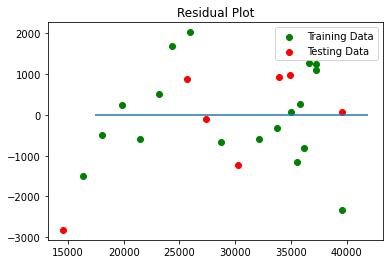

In [26]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [27]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.9734100373954638


In [28]:
print(model.intercept_)

[2346.33990847]


In [16]:
print(model.coef_)

[[-281.66321466 1891.92341196 -376.76352707 -261.21437629]]


In [17]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[39557.27764241]]


In [18]:
print(X_train.shape)

(18, 4)


In [19]:
print(y_train.shape)

(18, 1)


In [20]:
print(y_test.shape)

(7, 1)


In [21]:
print(X_test.shape)

(7, 4)


In [22]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [23]:
print(X.shape)

(25, 4)


In [24]:
print(y.shape)

(25, 1)


In [25]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
#plt.savefig('images/United States_full.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

IndentationError: unexpected indent (<ipython-input-25-b818283b2425>, line 10)

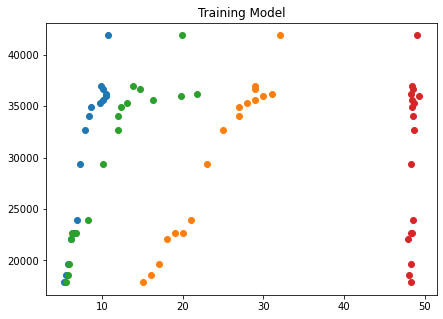

In [89]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

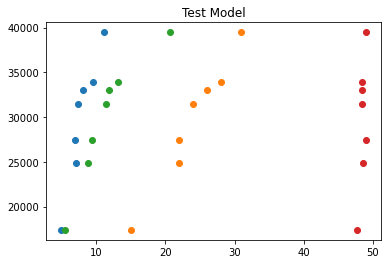

In [90]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

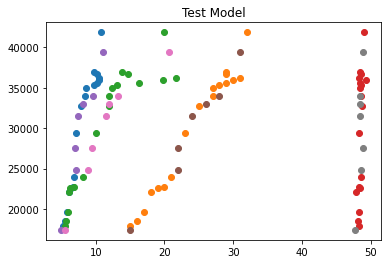

In [91]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [29]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     201.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           7.58e-16
Time:                        16:15:50   Log-Likelihood:                -211.24
No. Observations:                  25   AIC:                             432.5
Df Residuals:                      20   BIC:                             438.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.542e+04   5.22e+04      0.295      0.771   -9.34e+04    1.24e+05
Diabetes    -295.7862    774.325     -0.382      0.706   -1911.001    1319.428
Obesity     1714.3921    249.549      6.870      0.000    1193.841    2234.943
Overdose    -220.6857    175.039     -1.261      0.222    -585.810     144.439
Pct_O       -475.4759   1085.971     -0.438      0.666   -2740.772    1789.820
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.324
Skew:                           0.161   Prob(JB):                        0.850
Kurtosis:                       2.544   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
ols_df = result_lin.summary()
with open('images/National2019lag_OLS.txt', 'w') as fh:
    fh.write(ols_df.as_text())

In [120]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1193,12/31/1995,17589,4.98,15.0,5.5,47.683211,17393.76,United States
1145,12/31/1996,18067,5.23,15.0,5.5,48.259257,17850.20,United States
1097,12/31/1997,18780,5.52,16.0,5.7,48.109691,18543.37,United States
1049,12/31/1998,19892,5.80,17.0,5.9,48.270662,19639.37,United States
1001,12/31/1999,22356,6.09,18.0,6.1,47.897656,22081.02,United States
953,12/31/2000,22879,6.41,19.0,6.2,48.446173,22618.18,United States
905,12/31/2001,22902,6.62,20.0,6.8,48.332023,22674.20,United States
857,12/31/2002,24121,6.85,21.0,8.2,48.584221,23896.16,United States
809,12/31/2003,25034,7.12,22.0,8.9,48.561956,24817.91,United States
761,12/31/2004,27745,6.92,22.0,9.4,48.934943,27487.03,United States


In [121]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-121-493aa5db8a32>, line 6)

In [122]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-122-df82b370e7da>, line 6)

In [7]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-7-9ee316a35ba4>, line 6)

In [8]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
#plt.savefig('images/United States_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

IndentationError: unexpected indent (<ipython-input-8-5d5ee31ce4e8>, line 6)

In [9]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

NameError: name 'X' is not defined

In [10]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

NameError: name 'X' is not defined

In [11]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

NameError: name 'r_sq' is not defined

In [12]:
#dfi.export(test_df, 'test_df.png')

In [13]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

NameError: name 'test_df' is not defined

In [130]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975181,0.981664,0.953889,[-27088.369451660565],[[40026.95890383248]],41885.06,-849.66,1880.21,-290.466,446.527


In [131]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                 float64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [132]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.975181,0.981664,0.953889,[-27088.369451660565],[[40026.95890383248]],41885.06,-849.66,1880.21,-290.466,446.527


In [133]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]
#dfi.export(summary_df, 'images/United States_summary.png')

In [134]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.9752,0.9817,0.9539,-27088,-849.66,1880.21,-290.466,446.527,41885.06,40026


In [135]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.975200,0.981700,0.953900,-27088,-849.660294,1880.207442,-290.466278,446.526745,41885.060000,40026
